## Simulate and fit DG model for time-varying firing rate

Demoscript to sample from Dichotomized Gaussian model with specified correlation coefficients and time-varying (instantaneous) firing rate for every neuron, from the paper *'Modeling  Population  Spike Trains with Specified Time-Varying Spike Rates, Trial-to-Trial Variability, and Pairwise Signal and  Noise  Correlations', Lyamzin et al., Frontiers in Computational Neuroscience 2010*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
from  os import makedirs

from dg_python.dichot_gauss import DichotGauss, make_symmetric, cov_to_corr
from dg_python.optim_dichot_gauss import DGOptimise

import yaml

In [2]:
timebins = 100
trials = int(1e4)
num_neur = 2

In [3]:
# Set mean and correlation matrix
mean = np.random.random((timebins, num_neur))
var = mean * (1 - mean)
corr = np.array([[1., .1], [.1, 1.]])


In [4]:
# Sample from DG model
dg = DichotGauss(num_neur, mean=mean, corr=corr, make_pd=True)
y = dg.sample(repeats=trials)

In [5]:
y.shape

(100, 10000, 2)

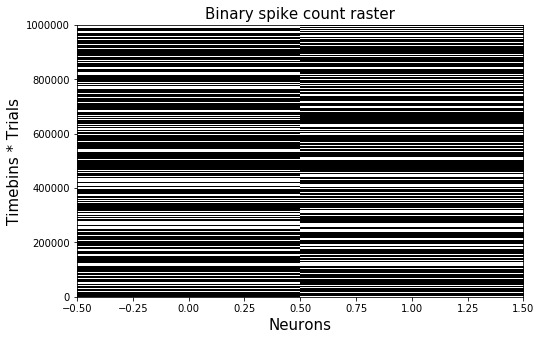

In [6]:
# Visualise y
plt.subplots(figsize=(8, 5))
plt.imshow(y.reshape(-1, num_neur), aspect='auto', origin='lower', cmap='binary')
plt.title('Binary spike count raster', fontsize=15)
plt.xlabel('Neurons', fontsize=15)
plt.ylabel('Timebins * Trials', fontsize=15)
plt.show()

In [7]:
# Do optimisation
dgopt = DGOptimise(data=y)    # Initialise optimiser

cov_y = dgopt.data_tvar_covariance    # Covariance of data
mean_hat = dgopt.gauss_mean    # Estimate of mean of multivariate Gaussian from data

corr_hat = dgopt.get_gauss_correlation(set_attr=True)    # Estimate of multivaraiate Gaussian correlation matrix

In [8]:
print('Target cov X1X2: %.2f     Estimated cov X1X2: %.3f\n' %(corr[1, 0], corr_hat[0, 1]))

Target cov X1X2: 0.10     Estimated cov X1X2: 0.102



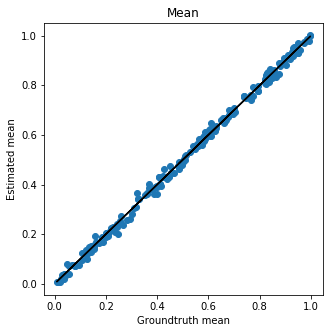

In [9]:
fig, ax1 = plt.subplots(1, 1, figsize=(5, 5))
ax1.set_title('Mean')
ax1.plot(mean.flatten(), mean_hat.flatten(), 'o')
ax1.plot(mean.flatten(), mean.flatten(), 'k')
ax1.set_xlabel('Groundtruth mean')
ax1.set_ylabel('Estimated mean')
plt.show()